# DMart Product Classification
## Logistic Regression, Random Forest & XGBoost Classification

### Checklist:
1. ✅ Dataset in CSV format
2. ✅ Complete POC with Logistic Regression, Random Forest and XGBoost
3. ✅ Import all necessary libraries
4. ✅ Data loading and storage
5. ✅ Fill missing values (fillna())
6. ✅ Label Encoding / One-Hot Encoding
7. ✅ EDA with minimum 3 visualizations
8. ✅ Remove unnecessary data before EDA
9. ✅ Train-Test Split (TTS) of X and Y
10. ✅ Model training and evaluation
11. ✅ ROC Curve and AUC analysis


---\n## Step 1: Import All Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    roc_curve, roc_auc_score, auc
)

# Warnings
import warnings
warnings.filterwarnings('ignore')
import re

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")


ModuleNotFoundError: No module named 'pandas'

---\n## Step 2: Data Loading and Storage

In [2]:
# Load the dataset
df = pd.read_csv('DMart.csv')

print("✅ Dataset loaded successfully!")
print(f"\nDataset Shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


✅ Dataset loaded successfully!

Dataset Shape: (5189, 9)
Rows: 5189, Columns: 9


In [3]:
# Display first few rows
print("\nFirst 5 rows of the dataset:")
df.head()



First 5 rows of the dataset:


,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,500 gm,India,Grocery > Grocery/Dry Fruits
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100 gm,India,Grocery > Grocery/Dry Fruits
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200 gm,India,Grocery > Grocery/Dry Fruits
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500 gm,USA,Grocery > Dry Fruits
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1 kg,USA,Grocery > Dry Fruits


In [4]:
# Display dataset information
print("\nDataset Information:")
df.info()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5188 non-null   object 
 1   Brand            4789 non-null   object 
 2   Price            5188 non-null   float64
 3   DiscountedPrice  5188 non-null   float64
 4   Category         5186 non-null   object 
 5   SubCategory      5186 non-null   object 
 6   Quantity         5188 non-null   object 
 7   Description      5187 non-null   object 
 8   BreadCrumbs      5186 non-null   object 
dtypes: float64(2), object(7)
memory usage: 365.0+ KB


In [5]:
# Statistical Summary
print("\nStatistical Summary:")
df.describe()



Statistical Summary:


,Price,DiscountedPrice
count,5188.000000,5188.000000
mean,344.030360,236.669719
std,601.034092,387.198716
min,0.000000,0.000000
25%,85.000000,64.000000
50%,175.000000,125.000000
75%,345.000000,249.000000
max,10990.000000,7999.000000


---\n## Step 3: Data Preprocessing

In [6]:
# Check for missing values
print("\nMissing Values:")
missing = df.isnull().sum()
print(missing[missing > 0])

# Fill missing values
df['Brand'].fillna('Unknown', inplace=True)
df.dropna(subset=['Price', 'DiscountedPrice', 'Category', 'Quantity'], inplace=True)

print(f"\nDataset shape after handling missing values: {df.shape}")



Missing Values:
Name                 1
Brand              400
Price                1
DiscountedPrice      1
Category             3
SubCategory          3
Quantity             1
Description          2
BreadCrumbs          3
dtype: int64

Dataset shape after handling missing values: (5184, 9)


In [7]:
# Parse Quantity
def parse_quantity(q):
    if isinstance(q, str):
        q = q.lower()
        num = re.search(r'(\d+(\.\d+)?)', q)
        if num:
            val = float(num.group(1))
            if 'kg' in q or 'l' in q:
                val *= 1000
            return val
    return 0

df['Quantity_Value'] = df['Quantity'].apply(parse_quantity)

# Feature Engineering: Discount Percentage
df['DiscountPercentage'] = (df['Price'] - df['DiscountedPrice']) / df['Price']
df['DiscountPercentage'] = df['DiscountPercentage'].fillna(0)

print("✅ Feature engineering completed!")
print(f"New features: Quantity_Value, DiscountPercentage")


✅ Feature engineering completed!
New features: Quantity_Value, DiscountPercentage


In [8]:
# Filter out categories with less than 2 samples
print("\nCategory Distribution (Before Filtering):")
print(df['Category'].value_counts())

min_samples = 2
category_counts = df['Category'].value_counts()
valid_categories = category_counts[category_counts >= min_samples].index
df = df[df['Category'].isin(valid_categories)]

print(f"\nFiltered Dataset Shape: {df.shape}")
print(f"Number of Categories: {df['Category'].nunique()}")



Category Distribution (Before Filtering):
Category
Personal Care                    1233
Packaged Food                    1125
Home & Kitchen                    880
Grocery                           840
Dairy & Beverages                 429
Specials                          187
Clothing & Accessories             97
Fruits & Vegetables                78
School Supplies                    69
Appliances                         53
Beauty & Cosmetics                 46
Raincoat                           32
DMart Grocery                      31
Plant Container                    23
Tableware                          18
Backpacks                          13
Zebronics                           5
Motorbike Helmets                   4
Baby & Kids                         4
Geep                                3
Kitchen Aprons                      3
Butterfly                           2
Computer Accessories                2
Joyo Plastics                       2
Pigeon                              

---\n## Step 4: Exploratory Data Analysis (EDA)

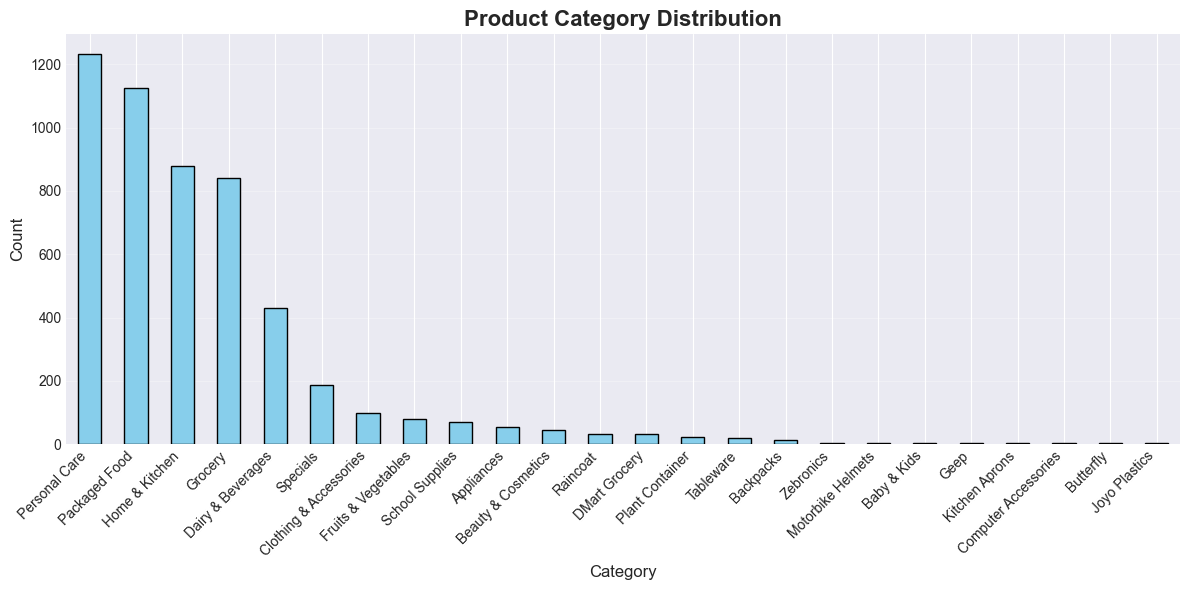

In [9]:
# EDA 1: Category Distribution
plt.figure(figsize=(12, 6))
df['Category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Product Category Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


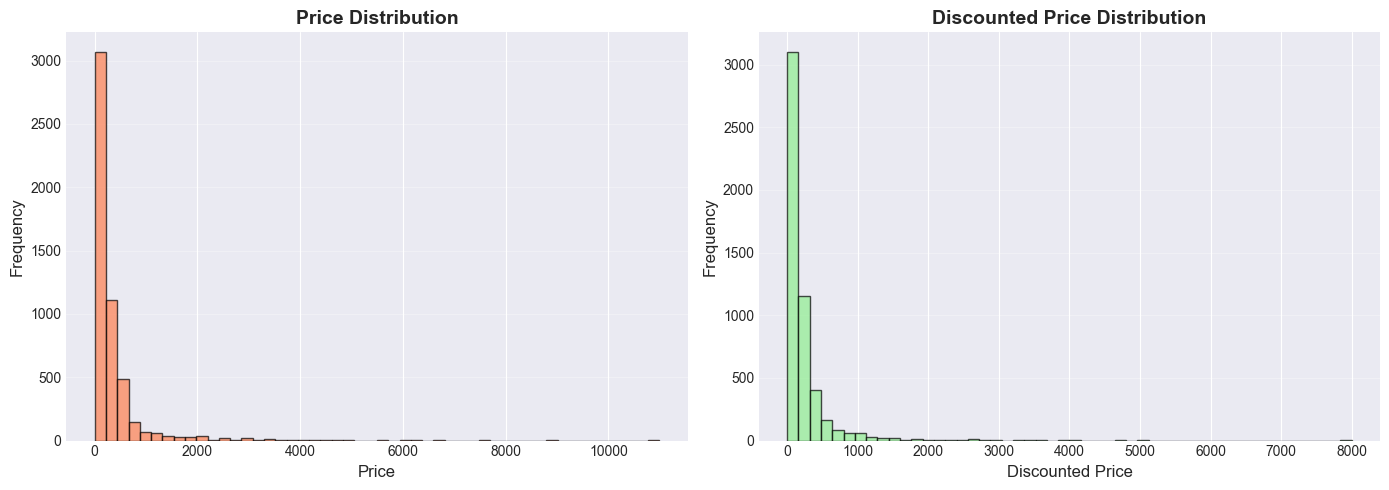

In [10]:
# EDA 2: Price Distribution
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Price'], bins=50, color='coral', edgecolor='black', alpha=0.7)
plt.title('Price Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(df['DiscountedPrice'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Discounted Price Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Discounted Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


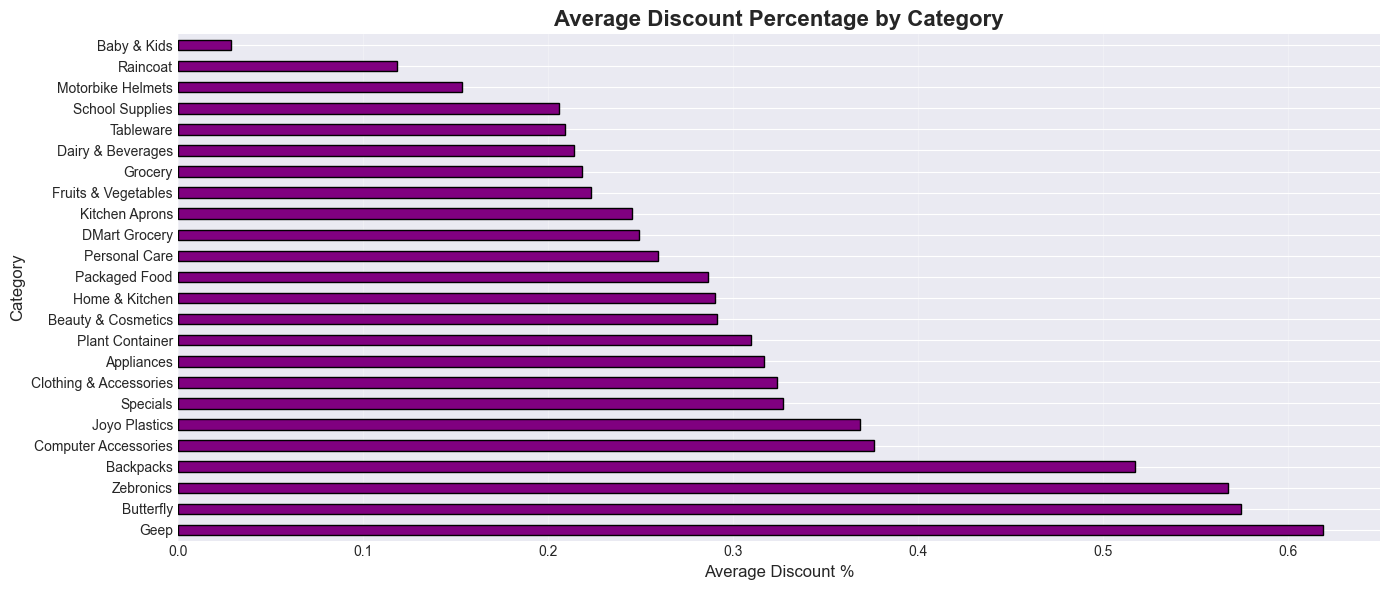

In [11]:
# EDA 3: Discount Percentage by Category
plt.figure(figsize=(14, 6))
category_discount = df.groupby('Category')['DiscountPercentage'].mean().sort_values(ascending=False)
category_discount.plot(kind='barh', color='purple', edgecolor='black')
plt.title('Average Discount Percentage by Category', fontsize=16, fontweight='bold')
plt.xlabel('Average Discount %', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


---\n## Step 5: Feature Engineering and Encoding

In [12]:
# Label Encoding
le_brand = LabelEncoder()
df['Brand_Encoded'] = le_brand.fit_transform(df['Brand'].astype(str))

le_category = LabelEncoder()
df['Category_Encoded'] = le_category.fit_transform(df['Category'])

print("✅ Label encoding completed!")
print(f"Unique Brands: {df['Brand'].nunique()}")
print(f"Unique Categories: {df['Category'].nunique()}")


✅ Label encoding completed!
Unique Brands: 823
Unique Categories: 24


In [13]:
# TF-IDF on Name (Text Feature)
print("Vectorizing Product Names...")
tfidf = TfidfVectorizer(max_features=2000, stop_words='english')
name_tfidf = tfidf.fit_transform(df['Name'].fillna(''))
print(f"TF-IDF Shape: {name_tfidf.shape}")

# Numerical Features
X_numerical = df[['Brand_Encoded', 'Price', 'DiscountedPrice', 'Quantity_Value', 'DiscountPercentage']]

# Scaling Numerical Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

# Combine Numerical and Text Features
print("Combining Features...")
X = hstack([X_scaled, name_tfidf])
y = df['Category_Encoded']

print(f"\n✅ Feature preparation completed!")
print(f"Final Feature Matrix Shape: {X.shape}")


Vectorizing Product Names...
TF-IDF Shape: (5179, 2000)
Combining Features...

✅ Feature preparation completed!
Final Feature Matrix Shape: (5179, 2005)


---\n## Step 6: Train-Test Split

In [14]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"✅ Train-Test Split completed!")
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


✅ Train-Test Split completed!
Train shape: (4143, 2005), Test shape: (1036, 2005)


---\n## Step 7: Model Training

In [15]:
# 1. Logistic Regression
print("\n" + "="*60)
print("Training Logistic Regression...")
print("="*60)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred_lr)
lr_prec = precision_score(y_test, y_pred_lr, average='weighted', zero_division=0)
lr_rec = recall_score(y_test, y_pred_lr, average='weighted')
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')
print(f"Accuracy:  {lr_acc:.4f}")
print(f"Precision: {lr_prec:.4f}")
print(f"Recall:    {lr_rec:.4f}")
print(f"F1-Score:  {lr_f1:.4f}")

# 2. Random Forest (Tuned)
print("\n" + "="*60)
print("Training Random Forest...")
print("="*60)
rf_model = RandomForestClassifier(n_estimators=300, max_depth=30, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_prec = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
rf_rec = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Accuracy:  {rf_acc:.4f}")
print(f"Precision: {rf_prec:.4f}")
print(f"Recall:    {rf_rec:.4f}")
print(f"F1-Score:  {rf_f1:.4f}")

# 3. XGBoost (Tuned)
print("\n" + "="*60)
print("Training XGBoost...")
print("="*60)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=300, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_prec = precision_score(y_test, y_pred_xgb, average='weighted', zero_division=0)
xgb_rec = recall_score(y_test, y_pred_xgb, average='weighted')
xgb_f1 = f1_score(y_test, y_pred_xgb, average='weighted')
print(f"Accuracy:  {xgb_acc:.4f}")
print(f"Precision: {xgb_prec:.4f}")
print(f"Recall:    {xgb_rec:.4f}")
print(f"F1-Score:  {xgb_f1:.4f}")



Training Logistic Regression...
Accuracy:  0.9015
Precision: 0.9009
Recall:    0.9015
F1-Score:  0.8937

Training Random Forest...
Accuracy:  0.7944
Precision: 0.8248
Recall:    0.7944
F1-Score:  0.7816

Training XGBoost...
Accuracy:  0.9073
Precision: 0.9063
Recall:    0.9073
F1-Score:  0.9040


---\n## Step 8: Model Evaluation and Comparison


MODEL PERFORMANCE COMPARISON
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.901544   0.900892 0.901544  0.893662
      Random Forest  0.794402   0.824766 0.794402  0.781639
            XGBoost  0.907336   0.906278 0.907336  0.904006


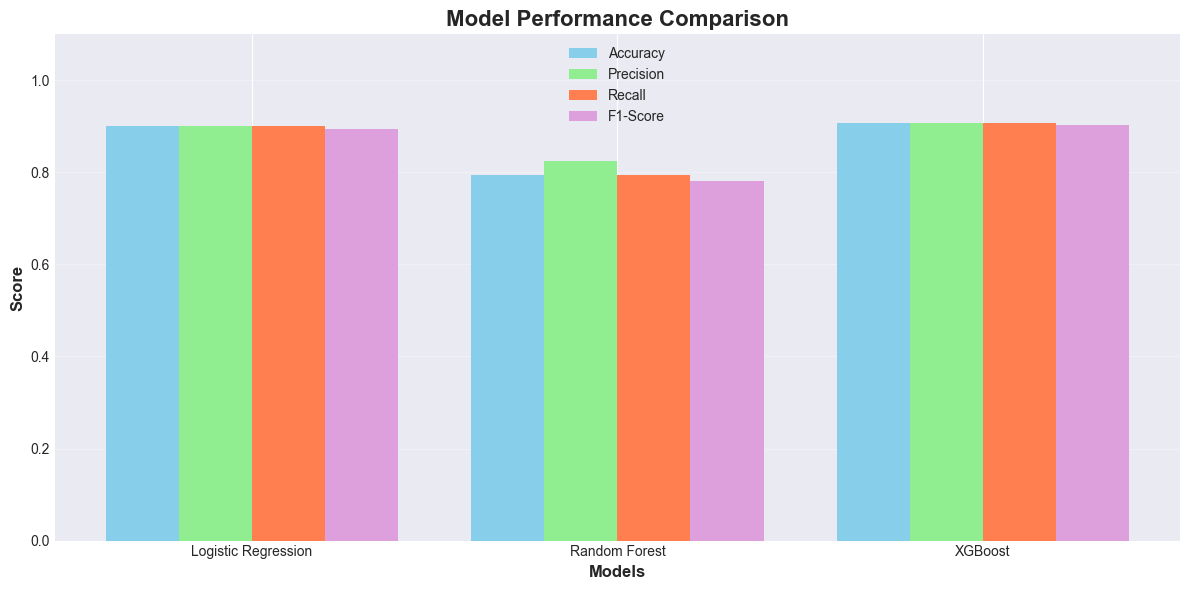

In [16]:
# Model Comparison
models_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [lr_acc, rf_acc, xgb_acc],
    'Precision': [lr_prec, rf_prec, xgb_prec],
    'Recall': [lr_rec, rf_rec, xgb_rec],
    'F1-Score': [lr_f1, rf_f1, xgb_f1]
})

print("\n" + "="*60)
print("MODEL PERFORMANCE COMPARISON")
print("="*60)
print(models_df.to_string(index=False))

# Visualization
plt.figure(figsize=(12, 6))
x = np.arange(len(models_df))
width = 0.2

plt.bar(x - 1.5*width, models_df['Accuracy'], width, label='Accuracy', color='skyblue')
plt.bar(x - 0.5*width, models_df['Precision'], width, label='Precision', color='lightgreen')
plt.bar(x + 0.5*width, models_df['Recall'], width, label='Recall', color='coral')
plt.bar(x + 1.5*width, models_df['F1-Score'], width, label='F1-Score', color='plum')

plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('Score', fontsize=12, fontweight='bold')
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.xticks(x, models_df['Model'])
plt.legend()
plt.ylim(0, 1.1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [17]:
# Best Model Analysis
best_acc = max(lr_acc, rf_acc, xgb_acc)
if best_acc == rf_acc:
    best_model = rf_model
    y_pred_best = y_pred_rf
    name = "Random Forest"
elif best_acc == xgb_acc:
    best_model = xgb_model
    y_pred_best = y_pred_xgb
    name = "XGBoost"
else:
    best_model = lr_model
    y_pred_best = y_pred_lr
    name = "Logistic Regression"

print(f"\n{'='*60}")
print(f"BEST MODEL: {name}")
print(f"Accuracy: {best_acc:.4f} ({best_acc*100:.2f}%)")
print(f"{'='*60}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))



BEST MODEL: XGBoost
Accuracy: 0.9073 (90.73%)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       0.80      0.44      0.57         9
           5       1.00      0.95      0.97        19
           7       0.67      0.33      0.44         6
           8       0.94      0.88      0.91        86
           9       1.00      0.62      0.77        16
          10       0.00      0.00      0.00         1
          11       0.92      0.92      0.92       168
          12       0.89      0.93      0.91       176
          15       1.00      1.00      1.00         1
          16       0.87      0.94      0.91       225
          17       0.92      0.95      0.94       247
          18       1.00      1.00      1.00         5
          19       1.00      1.00      1.00         6
          

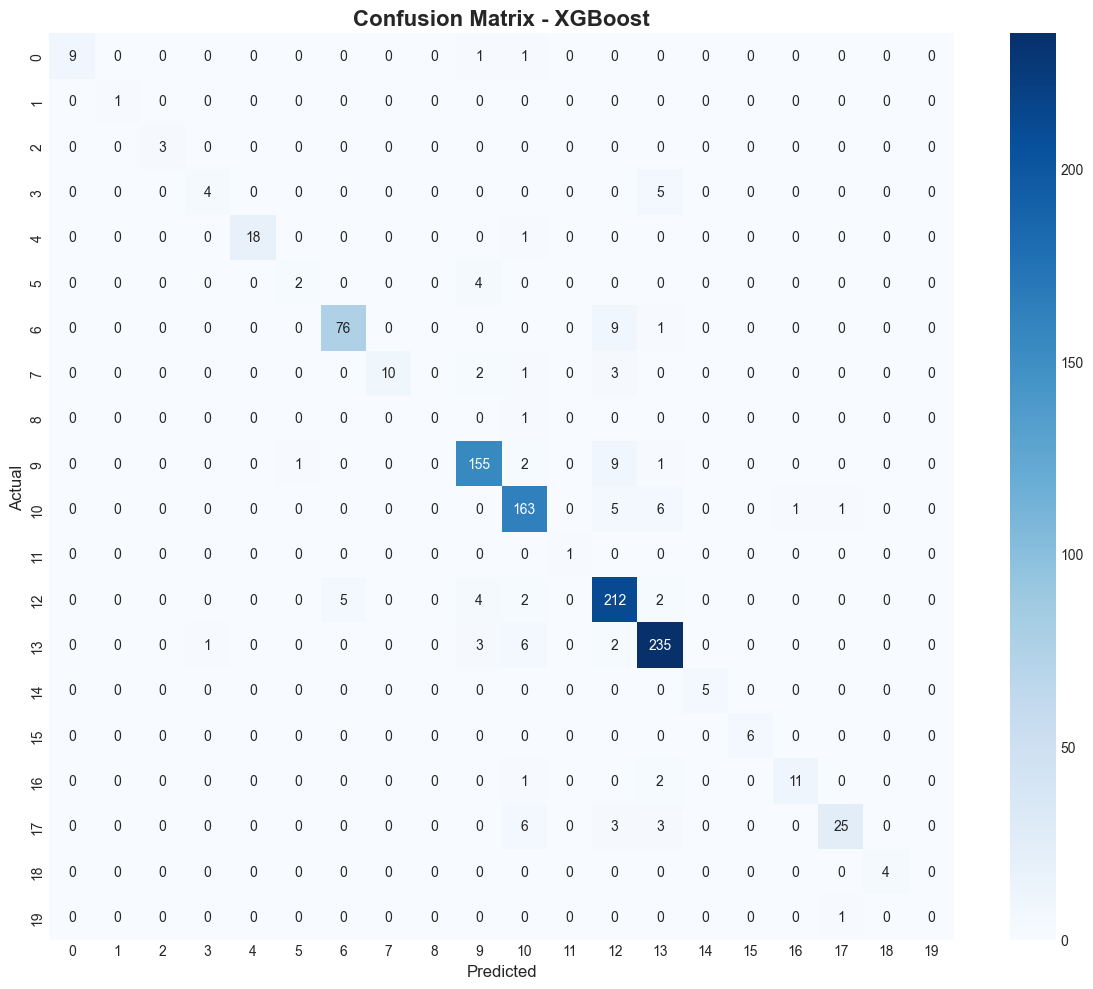

In [18]:
# Confusion Matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title(f'Confusion Matrix - {name}', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.tight_layout()
plt.show()


---\n## Step 9: ROC Curve and AUC Analysis

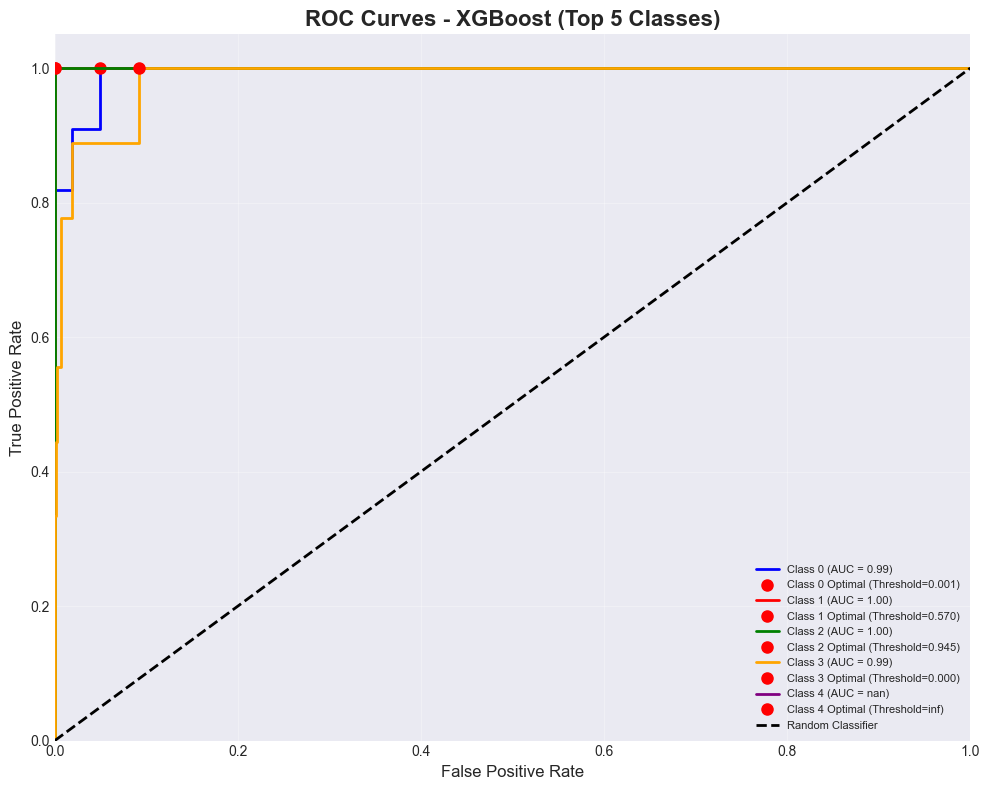


Macro-Average AUC: nan


In [19]:
# ROC Curve and AUC for Multi-class
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Get probability predictions
if hasattr(best_model, "predict_proba"):
    y_score = best_model.predict_proba(X_test)
elif hasattr(best_model, "decision_function"):
    y_score = best_model.decision_function(X_test)
else:
    print("Model does not support probability predictions")
    y_score = None

if y_score is not None:
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    thresholds = dict()
    
    for i in range(min(n_classes, 5)):  # Show top 5 classes
        fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plot ROC curves
    plt.figure(figsize=(10, 8))
    colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])
    
    for i, color in zip(range(min(n_classes, 5)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
        
        # Find optimal threshold (closest point to top-left corner)
        # Distance from (0,1) = sqrt((fpr)^2 + (1-tpr)^2)
        distances = np.sqrt(fpr[i]**2 + (1 - tpr[i])**2)
        optimal_idx = np.argmin(distances)
        optimal_threshold = thresholds[i][optimal_idx]
        
        # Plot red dot at optimal point
        plt.plot(fpr[i][optimal_idx], tpr[i][optimal_idx], 'ro', markersize=8,
                 label=f'Class {i} Optimal (Threshold={optimal_threshold:.3f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curves - {name} (Top 5 Classes)', fontsize=16, fontweight='bold')
    plt.legend(loc="lower right", fontsize=8)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Calculate macro-average AUC
    macro_auc = np.mean(list(roc_auc.values()))
    print(f"\nMacro-Average AUC: {macro_auc:.4f}")
